<a href="https://colab.research.google.com/github/755224unizar/TFG_Notes/blob/main/CollabNotebookTFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUADERNO DE NOTAS DEL TFG**

# Día 21 de febrero de 2021

A0001 12 500 7500 12-May-2020 12:33:59
A0001.mat 16+24 1000/mV 16 0 28 -1716 0 I
A0001.mat 16+24 1000/mV 16 0 7 2029 0 II
A0001.mat 16+24 1000/mV 16 0 -21 3745 0 III
A0001.mat 16+24 1000/mV 16 0 -17 3680 0 aVR
A0001.mat 16+24 1000/mV 16 0 24 -2664 0 aVL
A0001.mat 16+24 1000/mV 16 0 -7 -1499 0 aVF
A0001.mat 16+24 1000/mV 16 0 -290 390 0 V1
A0001.mat 16+24 1000/mV 16 0 -204 157 0 V2
A0001.mat 16+24 1000/mV 16 0 -96 -2555 0 V3
A0001.mat 16+24 1000/mV 16 0 -112 49 0 V4
A0001.mat 16+24 1000/mV 16 0 -596 -321 0 V5
A0001.mat 16+24 1000/mV 16 0 -16 -3112 0 V6
#Age: 74
#Sex: Male
#Dx: 59118001
#Rx: Unknown
#Hx: Unknown
#Sx: Unknown



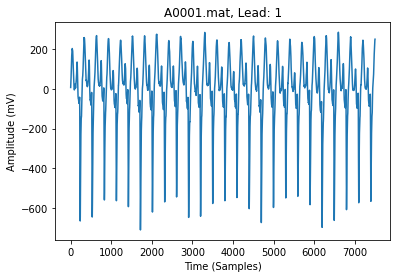

In [ ]:

# Día 21 de febrero de 2021
import scipy.io
import matplotlib.pyplot as plt
import pylab as pylab
# Importamos el dataset
myfile = 'A0001.mat'
lead = 1;             #Derivacion a consultar
data = scipy.io.loadmat(myfile)
X = data['val']
fig = plt.figure()
plt.plot(X[lead,:])    #Mostramos la primera derivacion del primer paciente del dataset
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude (mV)')
tit = myfile + ', Lead: '+str(lead)
plt.title(tit)
# Abrimos .hea
f = open('A0001.hea')
content = f.read()
print(content)

# Día 25 de febrero de 2021

**Classification of 12-lead ECGs: the PhysioNet/
Computing in Cardiology Challenge 2020**

En este paper se describe como fue el desarrollo del Challenge de 2020, así como cuáles fueron los resultados obtenidos por sus participantes. Resulta especialmente interesante que el método de puntuación contempla que se pueda puntuar al confundir dos anormalidades cardíacas que tienen los mismos síntomas en el ECG o el mismo tratamiento, así como la penalización por los malos diagnósticos que presentan mayor peligro para el paciente.

He encontrado muchos de los papers que presentaron los equipos con sus soluciones en: https://cse.google.com/cse?cx=007405203507124691154%3Ayowsrfsx8lk&ie=UTF-8&q=computing+in+cardiology+2020&sa=Search+volumes+28-47+%282001-2020%29&siteurl=www.cinc.org%2Farchives.shtml&ref=www.cinc.org%2Fconferences.shtml&ss=

**12-lead ECG Arrythmia Classification Using Convolutional Neural Network for
Mutually Non-Exclusive Classes**: http://www.cinc.org/archives/2020/pdf/CinC2020-124.pdf

Este equipo (BioS Team) propone un algoritmo de machine learning basado en redes neuronales convolucionales. Primero eliminan de las señales del ECG el ruido de alta frecuencia mediante un filtro de media móvil. Su red estaba formada por 4 bloques convolucionales y una capa totalmente conectada. (aún no entiendo muy bien que es esta capa).
Para trabajar con mayor uniformidad en las señales las remuestrearon todas a 100 Hz y se quedaron solo con los primeros 10 segundos (Si eran mas cortas repetían la grabación hasta los 10 s).
El preprocesado antes de la CNN consistía en aplicar un filtrado de media móvil (con una ventana de 5 muestras)para suavizar las señales, y reducir la señal extrayendo la media móvil calculada con una ventana de 20 muestras.
Después cada derivación se colocaba por filas en una matriz 2D que era la entrada de la red neuronal convolucional.
Los mejores resultados fueron obtenidos identificando Fibrilación Atrial (AF), Bloqueo de rama izquierda (LBBB), Pacing Rhytm (PR), Bloqueo de rama derecha(RBBB), Sinus Rhytm (SNR) y Sinus Tachycardia (STach).
Sin embargo, el algoritmo fallaba muchísimo en el caso de otras arritmias como 
CRBBB, LAnFB, LQRSV, NSIVCB, PVC, RAD, SA, SVPB, TInv y VPB.
Esto puede ser debido a que son patologías menos presentes en el dataset de entrenamiento. Este fallo se corrigió parcialmente considerando los 2 primeros minutos de cada grabación y haciendo uso de tres redes independientes. Una para los ECGs, otra para los intervalor RR y otra para los latidos medios de la señal.

Por otra parte, he descargado el código de ejemplo del desafío para Matlab y he intentado ejecutarlo aunque de momento no he sido capaz.


In [ ]:
# Intento importar el dataset de entrenamiento que he subido a mi Drive
# (De momento no he tenido exito)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Día 7 de marzo de 2021

**APUNTES DE FISIOLOGÍA DEL CORAZON**

(Citando y resumiendo de: Arthur C. Guyton, Tratado de Fisiología Médica, Cap. 13)

El corazón está formado por tres tipos principales de músculo: auricular, ventricular y fibras especializadas en excitación y conducción. Las dos primeras se contraen de forma similar a las fibras musculares esqueléticas, mientras que las últimas tienen pocas fibras contráctiles y se dedican a la rápida transmisión de impulsos electricos a traves del corazón.
En el músculo cardiaco las células musculares están tan estrechamente unidas que cuando una es excitada el potencial de acción se difunde a todas pasando de célula en célula, lateralmente, a través de interconexiones en forma de red.
El corazón está constituído principalmente por el sincitio auricular y el sincitio ventricular, ambos separados por un tejido fibroso. 
Esto hace que la estimulación de cualquier fibra auricular aislada hace que el potencial de acción se expanda por toda la masa auricular, siendo análogo el caso en el sincitio ventricular.

La conexión entre aurículas y ventrículos también es posible mediante el llamado haz A-V, que permite transimir el potencial de acción a traves del tejido que separa ambos sincitios.
El músculo cardiaco tiene un tipo peculiar de potencial de acción. Después de la "espiga inicial" la membrana se conserva despolarizada durante 0.15 a 0.3 segundos, manifestando una meseta, para después tener una brusca repolarización. Esta meseta hace que el potencial de acción dure 20 o 25 veces más que en los músculos esqueléticos, y origina un periodo de contracción prolongado en forma correspondiente.

**Periodo refractario del músculo cardiaco**

Como todo tejido excitable el músculo cardiaco es refractario a la nueva estimulación durante el potencial de acción rápida. Estímulos potentes pueden provocar una espiga en al final de la meseta del potencial de acción, pero esta espiga no se propaga a lo largo del músculo. Además, la fuerza de esta segunda contracción suele ser menor que la de la primera. Cuendo el intervalo entre dos contracciones sucesivas aumenta, también aumenta la fuerza de la segunda contracción hasta alcanzar, o incluso superar, a la primera.

El impulso cardiaco normal tampoco puede volver a excitar el músculo hasta después de de estar completado casi todo el proceso de repolarización. Por ello se considera periodo refractario del corazón como periodo refractario funcional, ya que es el intervalo de tiempo durante el cual un potencial de acción de otra parte del corazon no es capaz de excitar nuevamente una zona ya excitada de músculo cardiaco.
El perido refractario funcional normal de un ventrículo es aproximadamente de 0.25 a 0.3 segundos (aprox. la duración del potencial de acción).
Existe también un periodo refractario relativo (de unos 0.05 s) en el cual, aunque difícil, es posible excitar el músculo provocando una contracción prematura temprana.
Para el músculo auricular el periodo refractario funcional es mucho más breve que el ventricular, siendo de unos 0.15 segundos este y 0.03 segundos el refractario relativo.
Esto se traduce en que la frecuencia de contracción de las aurículas puede ser mucho mayor que la de los ventrículos.

La duración de la contracción del múscilo cardiaco es función principalmente de la duración del potencial de acción, ya que la contracción se inicia uns milésimas de segundo después de este y termina unas milésimas de segundo despues de que el potencial de acción termine.
Los peridos de contracción y relajación no disminuyen en la misma proporción al aumentar la frecuencia cardiaca, con lo que en ciertas condiciones el corazón no se relaja el tiempo suficiente como para permitir un llenado completo de las cavidades cardiacas antes de la siguiente contracción.

**Ciclo Cardiaco**

Cada ciclo cardiaco se inicia por la generación de un potenical de acción en el nódulo S-A, Sinoauricular (pared posterior de la aurícula derecha), este potencial viaja rápidamente por ambas aurículas y despúes, a través del haz A-V, hacia los ventrículos.
Debido a la disposición especial del sistema de condución de aurículas a ventrículos hay un retraso de más de 0.1 seg entre el paso del impulso por las aurículas y por los ventrículos. Esto hace que las aurículas se contraigan antes que los ventrículos, llenandose primero los ventrículos de sangre antes de realizarse la contracción enérgica ventricular que envía la sangre por todo el cuerpo.

**Relaciones entre el ECG y el ciclo cardiaco**

El electrocardiograma se compone de las ondas P, Q, R, S y T; que son voltajes eléctricos generados por el corazón y registrados con electrodos en la piel.
La onda P empieza justo antes del aumento de presión auricular, es decir, la onda P está causada por la difusión de la despolarización a lo largo de las aurículas y esto va seguido de la contracción auricular. Aproximadamente 0.16 segundos despues de la onda P aparecen ondas QRS, consecuencia de la despolarización de los ventrículos, que inicia la contraccion ventricular aumentando la presión en los ventrículos. Por lo tanto, el complejo QRS empieza poco antes de iniciarse la sístole ventricular.
Finalmente la onda T ventricular, representa la etapa de repolarización de los ventrículos(relajación), por lo que se da ligeramente antes de terminar la relajación ventricular.



# Día 11 de marzo de 2021

Hoy estoy utilizando las funciones readheader() y wavedet() para efectuar una identificación sencilla de algunas características de la señal.
Una cosa que he observado es que la señal se carga con una muestra más cuando la cargo con fread(fid, [12 Inf], 'int16'), siendo un vector de 1x7501; mientras que con el load de Matlab cargo vectores 1x7500.
También he usado la función wavedet para intentar delinear las señales y poder alinear las derivaciones en torno a un mismo QRS pero me han saltado unos errores de invalid fid. Probablemente sea porque estoy pasandole mal los parámetros a la función por lo que he preguntado y seguiré probando.
Finalmente he visto que lo que daba problemas era la escritura de un fichero de salida al final de la función wavedet() mediante una función llamada writeannot(). Para poder avanzar he comentado esa línea y de esa manera he conseguido los resultados de la delineación. 
He visto que los vectores de índices a veces tienen valor NaN (supongo que porque no han encontrado el evento), y esto ocurre en algún punto en muchas derivaciones.
He tomado el fichero 'A0001.mat' y he podido delinear todos los eventos asociados a las ondas P, R, S y T; así como al inicio del complejo QRS. He obtenido la siguiente figura en Matlab.


BMP
RGB
(970, 574)


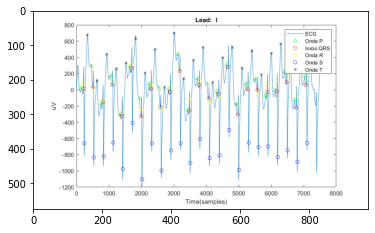

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
#Load the image
img = Image.open('drive/My Drive/TFG/Images/Delineacion1.bmp')
img.show()
print(img.format)
print(img.mode)
print(img.size)

plt.imshow(img)
# Imagen: https://drive.google.com/file/d/1uMrKrvJaM4JVlhc5UEPEaXobrouAraVZ/view?usp=sharing

A continuación, he diseñado un código que comprueba que las derivaciones estan escritas en el mismo orden y formato a lo largo de todos los datasets con los que se trabaja. El código devuelve un entero con el número de diferencias encontrados entre el formato de los distintos datasets. El código en Matlab es como el que muestro a continuación.


In [ ]:
% COMPROBACION DE LAS DERIVACIONES
set = ['Q' 'I' 'S'];        % Recorro los dataset comprobando que la info esta en el mismo formato
header1 = 'A0001.hea';
error = 0;
hea1 = readheader(header1);
for i = 1:length(set)
    hea2 = readheader([set(i),'0001.hea']);
    % Comprobamos que los nombres de las derivaciones están escritos igual y en el mismo orden
    error = error+sum(sum(hea1.desc ~= hea2.desc));  % Calculo el numero total de errores
end


Con este código he comprobado que el formato de las derivaciones se mantiene en los datasets CPS, PTB y el de StPetersburg. Hay dos datasets más que no he comprobado porque debido a su peso aún no los he descargado.
También he tratado de extraer la información personal de los pacientes que está comentada en los .hea con la función comments_header(), pero solo me ha devuelto variables vacías.

Después me he dedicado a formar la matriz que contiene cada derivación en una fila, estando el inicio de las derivaciones alineado en el mismo evento. En mi caso he elegido guardar las derivaciones desde su primer inicio de QRS hasta 5000 muestras después. El código que he utilizado en Matlab es el que sigue.

In [ ]:
% Pasamos a probar el delineador
sigdir = 'Training_WFDB_CPS\'; headir = 'Training_WFDB_CPS\'; matdir = 'Training_WFDB_CPS\';
position = [];      % Vector de stucts para almacenar los indices del delineador
for lead = 1:hea.nsig
    p = wavedet(sigdir, headir,matdir, hea.recname, 0, 'wav', lead, [1 Inf],0);
    s = 0:hea.nsamp;
    x_lead = x(lead,:);
    position = [position, p];
end

deriv = [];
N = 5000;   % Muestras a coger a partir del evento
figure,
for lead = 1:hea.nsig
    x_lead = x(lead,:);
    row = x_lead(position(lead).QRSon(1):position(lead).QRSon(1)+N-1);
    deriv =[deriv; row];
    subplot (12,1,lead),plot(row);
end
% En teoria deriv deberia ser una matriz cuyas filas son las derivaciones,
% todas ellas comenzando el inicio del primer QRS


También he ploteado las derivaciones juntas en un subplot para ver si se apreciaba claramente que todas empezaban en el mismo evento. Al hacer esto había derivaciones en las cuales parecía que no estaba bien alineado pero pude ser por las características de cada derivación.

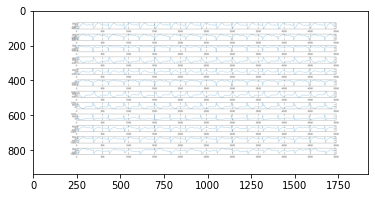

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img2 = Image.open('drive/My Drive/TFG/Images/LeadMatrixQRS1.bmp')
img2.show()
plt.imshow(img2)
# Imagen: https://drive.google.com/file/d/1ISdPUVk5-bJ_kwhLTYQcylw4pnHPJ9eZ/view?usp=sharing

También se ha intentado extraer la información característica de cada paciente con el uso de una función llamada comments_header, pero no se ha conseguido (quizás por desconocimiento del funcionamiento de la misma). Por este motivo he elaborado una pequeña función que lee los comentarios de los .hea y extrae el sexo, edad, diagnóstico y demás datos del paciente.


#Día 20 de marzo de 2021

Estudio ligero de *Electrocardiografía Práctica* del Dr. Dale Dubin

#Día 24 de marzo de 2021

Hoy he estado escribiendo código para ir formando la matriz imagen que servirá de entrada a la red neuronal.
Lo primero que se ha hecho es trabajar con una sola derivación y conformar una matriz en la cual en cada fila tuvieramos uno de los latidos de la señal completa y parte del siguiente. Los latidos estarían todos alineados y se observaría su contexto. Para hacer esto se decidió coger muestras 0.5 segundos antes del latido y 1 segundo despues. Como marcador del evento del QRS utilizamos los indices ***qrs*** del delineador. Debido a que no teníamos medio segundo de señal antes del primer QRS ni un segundo de señal después del último para implementar la formación de esta imágen se propusieron dos métodos. El primero y más rudimentario tomaba todos los latidos salvo el primero y el último, evitando así salirnos del vector de datos.

El segundo método, que se muestra a continuación, consistía en hacer un padding con muestras nulas al inicio y al final del vector de datos con el fin de poder coger siempre la misma cantidad de datos (aunque estos fueran nulos). Con este método se obtuvo la imagen que se muestra en la siguiente celda.


In [ ]:
# Codigo en Matlab que forma una matriz con cada latido en una fila y todos alineados
lead = 1;
x_lead = x(lead,:);
matriz = [];
N_antes = 500*0.5;   % Muestras a coger antes del evento
N_despues = 500;     % Muestras a coger despues del evento
x_lead = [zeros(1,N_antes), x_lead, zeros(1,N_despues)];
for i = 1:length(position(lead).qrs)
    
    row = x_lead(position(lead).qrs(i):position(lead).qrs(i)+2*N_despues-1);
    matriz =[matriz; row];
end

# Este codigo es para representar en un subplot cada fila de la matriz
figure,
for i = 1:size(matriz,1)
    
    subplot (24,1,i),plot(matriz(i,:));
    if(i==1)
        title('Right bundle branch block (59118001)');
    end
end

(-0.5, 749.5, 23.5, -0.5)

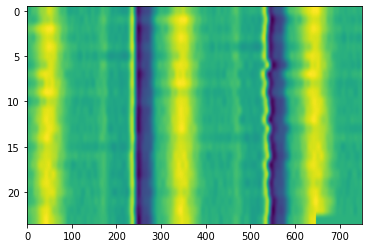

In [ ]:
# En el siguiente código muestro la imagen obtenida en matlab con el anterior método
# El plot representando cada latido puede verse en: https://drive.google.com/file/d/1ke5o183fl-56ewx_dgJFkNh_TdtNFFAr/view?usp=sharing
import scipy.io
import matplotlib.pyplot as plt
import pylab as pylab
# Importamos el dataset
myfile = '/content/drive/MyDrive/TFG/Variables/matriz_lead1.mat'
lead = 1;             #Derivacion a consultar
data = scipy.io.loadmat(myfile)
matriz = data['matriz']
plt.imshow(matriz)
plt.axis('tight')

Del mismo modo se ha generado una señal indicadora del inicio y final de los latidos que vale 1 en el latido y 0 en el resto. Esto se ha hecho para una sola derivación. Y el resultado obtenido puede verse a continuación.

In [ ]:
# Codigo empleado para obtener la matriz que contiene la señal indicadora de latidos con un latido en cada columna (aunque entran varios)
%% Formacion de señal escalon de latido para una sola derivacion
% Realmente esta no se utilizara como input de la red sino que usaremos la
% global de las 12 matrizaciones
lead = 1;
x_lead = x(lead,:);
escalon_QRS = zeros(1, length(x_lead));
for i = 1:length(position(lead).QRSon)
    escalon_QRS(position(lead).QRSon(i):position(lead).QRSoff(i)) = 1;
end
plot(escalon_QRS);

matriz = [];
N_antes = 500*0.5;   % Muestras a coger antes del evento
N_despues = 500;     % Muestras a coger despues del evento
% Hacemos padding para poder coger todos los latidos con las mismas muestras
escalon_QRS_pad = [zeros(1,N_antes), escalon_QRS, zeros(1,N_despues)];  
for i = 1:length(position(lead).qrs)
    
    row = escalon_QRS_pad(position(lead).QRSon(i):position(lead).QRSon(i)+2*N_despues-1);
    matriz =[matriz; row];
end
figure,
for i = 1:size(matriz,1)
    
    subplot (24,1,i),plot(matriz(i,:),'r');
    if(i==1)
        title('Right bundle branch block (59118001)');
    end
end



(-0.5, 999.5, 23.5, -0.5)

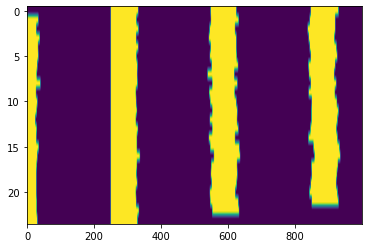

In [ ]:
# En el siguiente código muestro la imagen obtenida en matlab con el anterior método
# El plot representando cada latido puede verse en: https://drive.google.com/file/d/1ZvsiIpYI8pDtbX4vs6a9k5PBQrpA6bFR/view?usp=sharing
import scipy.io
import matplotlib.pyplot as plt
import pylab as pylab
# Importamos el dataset
myfile = '/content/drive/MyDrive/TFG/Variables/matriz_escalon_lead1.mat'
lead = 1;             #Derivacion a consultar
data = scipy.io.loadmat(myfile)
matriz = data['matriz']
plt.imshow(matriz)
plt.axis('tight')

# Esta imagen muestra claramente como los latidos se van desalineando conforme cambia en RR

Como se ha comentado, el objetivo sería formar una señal escalon como la anterior pero que representara los latidos globales y no solo los de la primera derivación. Un método para hacer esto es considerar que el inicio del escalón es el inicio del QRS en la **primera** derivación que aparezca, y el final del escalón será el final del QRS en la **última** derivación en la que aparezca.
Este método es útil pero depende de que un latido sea registrado en todas las derivaciones y que los QRS detectados en todas las derivaciones sean "reales" y no artefactos debidos al ruido y etiquetados como QRS por el delineador.
Para asegurarnos de en que índice global está cada latido comprobaremos para cada latido detectado en una derivación que en otras 9 o 10 derivaciones aparece el **mismo latido** (están dentro de una ventana temporal concreta).
Para comprobar si teniamos alguna detección errónea con el fichero con el que estamos haciendo pruebas (A0001.mat) representamos por filas los instantes en los que en cada derivación había un latido, y comprobamos que para esta señal todos los latidos aparecían en todas las derivaciones. El código para hacerlo se muestra a continuación.

In [ ]:
# Comprobar latidos en todas las derivaciones para formar el eje temporal comun

eje = 1:length(x(1,:));
figure,
for i = 1:12
    hold on,
    plot(position(i).qrs, ones(1,24)-i, 'k.');
    
end
title('Latidos detectados por cada derivacion'), ylim([-13 1]);
% En el caso de la muestra A0001.mat todos los latidos se detectan en todas
% las derivaciones por lo que ninguna deteccion es erronea o debida al
% ruido
# El resultado de este figure puede verse en: https://drive.google.com/file/d/1VrCRls_M-YP39kZoZRifhgW1Y278C1lN/view?usp=sharing

En este caso podemos ver a simple vista que cada latido tiene su representación en las demás derivaciones y que ninguna derivación muestra un latido que las demás no detecten. Sin embargo, en el caso de encontrarnos alguna señal con errores deberíamos ser capaces de identificar que una detección no es realmente un latido si en un rango temporal corto no existen detecciones en al menos 9 derivaciones más.
La duración de este rango temporal se situó en base a la experiencia alrededor de los 10 ms. Sin embargo, se ha calculado para este caso sin errores cual es la distancia máxima que había entre detecciones del mismo latido y se ha visto que podía llegar a ser de unos 28 ms.
El código utilizado para este fin se muestra a continuación:

In [ ]:
# Codigo que recoge los indices en los que esta cada latido en cada derivación y calcula la diferencia máxima
# de indices para el mismo latido 

for i = 1:1
   max_dif = [];
   for j = 1:length(position(i).qrs)
       ind = [];
       
       for k = 1:12
           ind = [ind, position(k).qrs(j)];
           
       end
       max_dif = [max_dif,max(diff(ind))];
   end
    
end
# Las mayores diferencias entre índices son de 14 muestras, que a la frecuencia de muestreo corresponden con 28 ms

El siguiente paso sería, dadas 12 derivaciones, comprobar que latidos se detectan en casi todas las derivaciones y obtener los indices generales de inicio y final de QRS como la mediana entre los índices de inicio y fin de QRS de las derivaciones.
Por el momento he escrito un código que permite calcular los índices globales en los que se detecta un QRS, teniendo en cuenta los latidos de todas las derivaciones.

In [ ]:
N_mismo_latido = 500*28*1e-3;   # Contaremos como latidos válidos aquellos que coinciden en las derivaciones en una ventana de 28 ms
ind_QRS = [];

for i = 1:12
   max_dif = [];
   for j = 1:length(position(i).qrs)
       ind = [];
       
       for k = 1:12
           ind = [ind, position(k).qrs(j)];
           
       end
       % Compruebo la maxima distancia entre mi latido j y el latido j de las demas derivaciones
       mdif = max(diff(ind));   
       max_dif = [max_dif,mdif];
       
       if(mdif<=N_mismo_latido)
           ind_QRS(i,j) = position(i).qrs(j);
       end
       
   end
    
end
# La matriz ind_QRS ahora contiene por columnas los indices de cada latido
# valido en cada derivacion. Tras esto para obtener la localización global
# de cada QRS podriamos realizar la mediana de cada columna
ind_Global = median(ind_QRS,1);
figure, plot(ind_Global, ones(1, length(ind_Global)), 'k.');
title('Latidos globales (qrs global)');
# El plot de las marcas de QRS globales puede verse aqui: https://drive.google.com/file/d/1EGbLyrreVhchL9VD6g30BJSqY7aIik4D/view?usp=sharing


# Sin embargo, este codigo solo sirve si todas las derivaciones han detectado el mismo numero de qrs, y exige que un latido se detecte en todas
# para ser contado como tal.

#Día 27 de marzo de 2021
Tras comentar los resultados con los tutores me voy a centrar en generar las imágenes sin padding y considerar que un mismo latido se puede detectar en otra derivación a una distancia de hasta 100 ms (en su día lo entendí mal y pensé que eran 10ms).

#Día 29 de marzo de 2021
Hoy he escrito una primera versión del código para obtener los índices globales de QRS. Como me resultaba un poco complicado considerarlo todo esta primera versión considera que todos los latidos son detectados en la primera derivación y después se asegura que al menos se hayan detectado en 9 derivaciones más en un margen de 100ms. Después con los índices de las detecciones de cada latido se realiza la mediana para obtener una índice de latido global. Este código se podría adaptar facilmente para calcular índices globales de QRSon y QRSoff para formar la señal escalón que indicase un QRS global.


In [ ]:
# Guardamos los índices de deteccion de cada latido en cada derivacion si cumple las condiciones
N_mismo_latido = 500*100*1e-3;
ind_QRS = [];
% Para esta primera version voy a considerar que todos los latidos son
% siempre detectados por la primera derivacion
for i = 1:length(position(1).qrs)
    ind_actual=position(1).qrs(i);
    ind_QRS(i,1) = ind_actual;
    for j = 2:12
        for k=1:length(position(j).qrs)
            if(abs(ind_actual- position(j).qrs(k))<N_mismo_latido)
                ind_QRS(i,j) =  position(j).qrs(k);
            end
        end
    end
    
end

# La matriz ind_QRS ahora contiene por filas los indices de cada latido
# valido en cada derivacion. Tras esto para obtener la localización global
# de cada QRS podriamos realizar la mediana de cada fila
ind_Global = [];
#Cuando un latido no se detecta en una derivación su indice aparece como 0, por lo que lo pondremos a NaN
# para excluirlo de la mediana 
ind_QRS(ind_QRS==0) = NaN;
for i=1:size(ind_QRS, 1)
    row_ind = ind_QRS(i,:);
    if(length(row_ind(~isnan(row_ind)))>9)
        ind_Global(i) = median(row_ind,2, 'omitnan')';
    end
end
   

# Día 1 de abril de 2021
Hoy he estado escribiendo un código genérico que procesara datasets enteros generando sus matrices imagen por derivación y guardándolos en una carpeta del workspace. También he observado que la primera versión del código anterior que calculaba los índices globales del QRS falla en algunos casos en los que la detección de latidos en la primera derivación ha sido un poco "rara", un ejemplo de esto ocurre con el fichero A0032.mat del dataset. Hace falta adaptar este código para que sea más robusto y no deje fuera a latidos potencialmente válidos.

Haciendo este procesado del dataset CPS entero he visto que hay algunos ficheros con derivaciones que no parecen ser correctas. Un ejemplo de esto sería el A0718.mat, en el cual las derivaciones 11 y 12 presentan un pico altísimo (y en el caso de la 12 después del pico es nula). Un ejemplo de esto para el fichero A0856.mat (para el cual también pasa) puede verse en esta imagen: https://drive.google.com/file/d/1kqLa4vdaU7Boi8jgk_N0Do8eIn5tZxQr/view?usp=sharing

A continuación he pasado a comprobar si había más ficheros que dieran problemas con el delineador en el dataset CPS.

Este mismo error ocurre para los ficheros: A1035.mat, A1372.mat, A1440.mat, A1526.mat, etc. 

En todos estos casos la derivación que causa el error presenta unos picos desorbitados que provocan que el delineador no pueda extraer los índices de los eventos. Además, según he observado, esto ocurre siempre con las últimas derivaciones.

Debido a esto, el delineador me estaba devolviendo un struct con menos campos (y nulos) que para el resto de derivaciones y al introducirlo en el vector de structs me estaba dando un error. Esto también impide que forme la matriz imagen de estas derivaciones ya que no tengo referencias temporales de la posición de los QRS. 
A continuación he pasado a comprobar si había más ficheros que dieran problemas con el delineador en el dataset CPS.
Con el fichero A0848.mat, el delineador ha fallado indicando lo siguiente:

      Index in position 1 is invalid. Array indices must be positive integers or logical values.

Error in fiducial (line 69)

      if length(find(max(abs(w(n1,1))./(abs(w(n1,1)))<1.2))==1),

Error in wavedet (line 277)

        fiducial; % Detection of fiducial point % 22/05/02 Rute including scale 5 % 07/06/02 Rute exclui escala5



# Día 11 de abril de 2021

Tras la última reunión con los tutores se definieron varias tareas que realizar a continuación. Entre ellas están: verificar la robustez del cálculo de la posición del latido "medio" mediante la convolucion de tren de deltas con ventana en cada derivación y la posterior suma, utilizar la función baseline2 para eliminar en lo posible la línea de base de las derivaciones antes de delinear, generar una señal de pulsos rectangulares indicando la primera detección del inicio de un latido y la última detección del final del mismo, y la adaptación del código para permitir la delineación de señales remuestreadas a 500 Hz.

Por el momento he comprobado que el método de la suma del tren de deltas enventanado en cada derivación es muy sólido, y devuelve los índices generales de los latidos para todos los ficheros que se han probado (A0001.mat hasta A1000.mat). Por las propiedades de este cálculo estos índices representan una especie de centro de masas del latido a través de las derivaciones.

También me he dedicado a probar la función baseline2 para eliminar la línea de base. Por el momento los resultados que he obtenido no parecen mejorar la señal original, probablemente por mal uso de la función.

Despues he tratado de usar el delineado multilead pero he tenido problemas con los identificadores de fichero. Creo que los paths que le paso son correctos pero volveré a comprobarlo más adelante.

He implementado un apaño para cuando el delineador no es capaz de detectar los eventos en alguna derivación. Si todo funciona bien, el delineador me devuelve un struct con 19 campos. Cuando no funciona con alguna derivación devuelve un struct de 16 campos vacíos. El apaño que he hecho es detectar estos casos y sustituir el struct que devuelve el delineador por un struct de 19 campos vacíos definido a mano.
Esto permite que el código no falle y simplemente no genera una imagen de esa derivación.

Cuando consiga hacer funcionar el delineador multilead podría saber directamente el inicio y final de todos los QRS en las 12 derivaciones. De esta manera la formación del tren de pulsos rectangulares sería automática.

# Día 19 de abril de 2021

Después de preguntar a los tutores por el modo de uso de baseline2 y de wavedet_3D he conseguido obtener una buena limpieza de línea de base.
El error estaba en el parámetro nots que yo había interpretado mal. Este parámetro es un vector que indica la posición del  intervalo PR, es decir entre el final de la onda P y el inicio del QRS. En general con coger 80 ms antes del QRS es suficiente. Aplicando esto el código de limpieza de línea de base de una derivación sería algo así:

In [ ]:
# Código que aplica la limpieza de línea de base asumiendo que el intervalo PR se sitúa 80 ms antes del QRS
x_lead = x(10,:);
not_samples = hea.freq*80e-3;
x_limpia = baseline2(x_lead', round(position(10).qrs - 0.08 *hea.freq), 0, not_samples)';

Otra de las cosas que había preguntado era el modo de uso de wavedet_3D, por si su empleo mejoraba la utilidad de wavedet. Sin embargo, Juan Pablo me ha comentado que en el fondo el código de delineación que tenía programado con wavedet es igual que lo que haría wavedet_3D. Por ello, me ha dicho que la mejor opción sería delinear todas las derivaciones con wavedet y después aplicar unas "reglas" o algoritmo que permita alinear los latidos y encontrar el principio y final de cada QRS, onda P y onda T.
Para facilitar esto me ha recomendado que use wavedet con un anotador externo de QRS. Esto significa que al tener una referencia externa del QRS ya no hace la detección QRS (se fía de la entrada) sino que hace las demás marcas y en todas las derivaciones detectará los mismos latidos de manera "forzosa". Al usar esta opción aplicar las reglas será más sencillo debido a que los latidos estarán alineados.
Aun así, la función pide un fichero de anotaciones de QRS externo que aún no se como generar, por ello preguntaré en cuanto me sea posible.
Por otro lado, por fin he resuelto el procesado de ficheros con fs distinta de 500 Hz. Para hacerlo en estos casos no solo remuestreo las señales sino que genero un nuevo fichero .hea con su nuevo dato de fs en un directorio llamado Ficheros_Fs_Cambiada. 


In [ ]:
# Codigo de remuestreo y generacion de nuevo .hea con la nueva fs

if hea.freq~=500
        disp('Remuestreando señal');
        %x = resample(x', 500, hea.freq)'; % Remuestreamos para tenerla a 500 Hz
        hea.freq = 500;
        fid = fopen(['Ficheros_Fs_Cambiada\',hea.recname,'.hea'], 'w');
        for i=0:hea.nsig
            if i==0
                fprintf(fid, [hea.recname,' ',num2str(hea.nsig), ' ',num2str(hea.freq),' ', num2str(hea.nsamp), ' ', num2str(hea.date(1)), ' ',num2str(hea.date(2)), '\n']);
            else
                fprintf(fid,[hea.fname(i,:), ' ', num2str(hea.fmt(i)),'+',num2str(hea.offset(i)),' ', num2str(hea.gain(i)),'/',hea.units(i,:),' ', num2str(hea.adcres(i)),' ', num2str(hea.adczero(i)),' ', num2str(hea.initval(i)),' ',num2str(hea.cksum(i)),' ', num2str(hea.bsize(i)), hea.desc(i,:),'\n' ]);
            end
        end
        fclose(fid);
        headir = 'Ficheros_Fs_Cambiada\';
end

Este es el fichero que luego le paso a wavedet como headir, y por tanto ve que la fs es 500 Hz y no se queja.
Sin embargo, he observado que wavedet saca muchos warnings de anotaciones repetidas al delinear estas señales remuestreadas, no se si tiene que ver con algun fallo en el remuestreo o en la lectura del nuevo .hea.
Ademas, haciendo un plot de los índices de qrs he visto que todos se apelotonan en la primera mitad de la señal ECG, por lo que entiendo que a pesar de modificar el fichero .hea el delineador sigue delineando como si la señal estuviese a la frecuencia original. 
Sin embargo, si modifico el fichero .hea pero no efectuo el remuestreo, las detecciones del QRS se realizan correctamente, a pesar de ser una señal muestreada a otra fs.

# Día 21 de abril de 2021

Hoy he estado poniendo en práctica los consejos de Juan Pablo respecto a las dudas que tenía de la anotación de QRS externa con wavedet. La implementación que he hecho ha sido una primera delineación de las 12 derivaciones como ya hacía, luego la obtención de los latidos promedio mediante la convolución y suma de latidos detectados en todas las derivaciones y un umbral. Este vector de índices de QRS lo he guardado un un .mat en una carpeta llamada AnotacionesQRS. De esta manera esperaba poder usar wavedet con esas anotaciones externas. Sin embargo, de los 3 parámetros de la anotación externa que son necesarios (anot_fmt, aname y dirann), desconozco que pasarle como anot_fmt. He probado con 0, 1 y 2 y en todos los casos me ha dado error de formato(1), o no ha encontrado el fichero de anotaciones(2).
(1)
Error using wavedet (line 146)
Bad annotation format for external QRS annotation file
(2)
Error using wavedet (line 136)
QRS annotation file not found

Por otro lado sigo teniendo un montón de anotaciones repetidas al delinear un fichero que estaba a 257 Hz, pero he consultado en que eventos estaban las recibidas y solían ser en Pon con P, o en qrs con S. De todos modos no se si esto puede afectar negativamente a la formación de la señal pulso rectangular que marque el inicio y final de ciertos eventos (onda P, QRS, onda T).

Al remuestrear, los valores del .hea de freq y de nsamp deberían cambiarse, al cambiar la freq a 500 no hay problema pero si le paso al delineador el .hea con el nuevo número de muestras  da este error:

Index in position 2 exceeds array bounds.

Error in wavedet (line 231)
        sig = sig(:,leadinfile);   % Only selected lead.  --> JP 2006  I changed lead by leainfile... see at the top

Tampoco se a que puede ser debido y he preguntado todo esto a Juan Pablo otra vez.

En cualquier caso he implementado la limpieza de línea de base en la cadena de procesado. No tengo muy claro si debería usar para la limpieza de cada derivación sus anotaciones concretas de QRS o si sería mejor limpiarlas todas usando los índices globales de QRS.
También he retocado el formato del código de procesado de dataset para que sea más legible, a continuación lo adjunto. Por el momento solo genera una imagen por cada derivación, falta la generación de las imágenes sinteticas de inicio y final de QRS, onda P etc.


In [ ]:
# CODIGO QUE ENCADENA LOS DIFERENTES MÓDULOS DE PROCESADO PARA PROCESAR MECÁNICAMENTE UN DATASET ENTERO
%% Procesado
empty_struct = struct('Pon',{[]},'P',{[]},'Poff',{[]}, 'QRSon',{[]},'Q',{[]},'R',{[]},'Fiducial',{[]},'qrs',{[]},'Rprima',{[]},'S',{[]},'QRSoff',{[]}, 'Ton',{[]},'T',{[]},'Tprima',{[]},'Toff',{[]},'Ttipo',{[]},'QRSmainpos',{[]},'QRSmaininv',{[]},'Pprima',{[]});
for fichero=1:100
    
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~LECTURA DATOS
    disp(['Procesando fichero ',num2str(fichero)]);
    if fichero<10
        num=['000', num2str(fichero)];
        elseif (fichero>=10 && fichero<100)
                num=['00', num2str(fichero)];
            elseif (fichero>=100 && fichero<1000)
                    num=['0', num2str(fichero)];
                else
                    num=num2str(fichero);
     end
            
    file = ['A',num,'.mat'];
    header = ['A',num,'.hea'];
    lead = 1;
    hea = readheader(header);   % -> Struct con todos los campos de informacion
    fid=fopen(file);
    x=fread(fid,[12 Inf],'int16');
    x=1000/hea.gain(lead) * x; % in microvolts (para tener la señal en microvoltios incluso siendo otra la ganancia)
    %sigdir = 'Training_WFDB_StPetersburg\';headir = 'Training_WFDB_StPetersburg\';matdir = 'Training_WFDB_StPetersburg\';
    sigdir = 'Training_WFDB_CPS\';headir = 'Training_WFDB_CPS\';matdir = 'Training_WFDB_CPS\';
    
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~REMUESTREO
    if hea.freq~=500
        disp('Remuestreando señal');
        x = resample(x', 500, hea.freq)'; % Remuestreamos para tenerla a 500 Hz
        hea.freq = 500;
        
        fid = fopen(['Ficheros_Fs_Cambiada\',hea.recname,'.hea'], 'w');
        for i=0:hea.nsig
            if i==0
                fprintf(fid, [hea.recname,' ',num2str(hea.nsig), ' ',num2str(hea.freq),' ', num2str(size(x,2)), ' ', num2str(hea.date(1)), ' ',num2str(hea.date(2)), '\n']);
            else
                fprintf(fid,[hea.fname(i,:), ' ', num2str(hea.fmt(i)),'+',num2str(hea.offset(i)),' ', num2str(hea.gain(i)),'/',hea.units(i,:),' ', num2str(hea.adcres(i)),' ', num2str(hea.adczero(i)),' ', num2str(hea.initval(i)),' ',num2str(hea.cksum(i)),' ', num2str(hea.bsize(i)), hea.desc(i,:),'\n' ]);
            end
        end
        fclose(fid);
        headir = 'Ficheros_Fs_Cambiada\';
    end
    
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DELINEADOR
    position = [];      % Vector de stucts para almacenar los indices del delineador
    for lead = 1:hea.nsig
        p = wavedet(sigdir, headir,matdir, hea.recname, 0, 'wav', lead, [1 Inf],0);
        if length(fieldnames(p))~=19
           p = empty_struct; 
        end
        position = [position,p];
    end
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BASELINE
    not_samples = hea.freq*80e-3;
    x_limpia = zeros(size(x,1),size(x,2));
    for lead = 1:hea.nsig
        x_lead = x(lead,:);
        x_limpia(lead,:) = baseline2(x_lead', round(position(lead).qrs - 0.08 *hea.freq), 0, not_samples)';
    end
    clear x;
    x=x_limpia;
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~GLOBAL IND
    N_mismo_latido = 500*100*1e-3;    
    v = hanning(N_mismo_latido);
    deltas = zeros(12,size(x,2));
    convs = zeros(12, size(x,2)+length(v)-1);
    for i = 1:hea.nsig
        deltas(i,position(i).qrs)=1;
        convs(i,:) = conv(deltas(i,:),v);
    end
    latidos = sum(convs,1);
    [pks,gl_ind] = findpeaks(latidos,'MinPeakHeight',8);
    if isempty(gl_ind)
        disp('Warning: Fallo de calculo de indices globales')
    end

    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FORMACION DE IMAGENES
    matrices = cell(1, hea.nsig);
    matriz = [];
    N_antes = hea.freq*0.5;   % Muestras a coger antes del evento
    N_despues = hea.freq;     % Muestras a coger despues del evento
    for lead=1:hea.nsig
        x_lead = x(lead,:);
        for i = 2:length(position(lead).qrs)-1
            if(position(lead).qrs(i)-N_antes>0 && position(lead).qrs(i)+N_despues-1<length(x_lead))
                row = x_lead(position(lead).qrs(i)-N_antes:position(lead).qrs(i)+N_despues-1);
                matriz =[matriz; row];
            end
        end
        matrices{lead} =  matriz;
        matriz = [];
    end
    % matrices ahora contiene las matrices imagen de cada derivacion

    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SAVE IMG
    save(['Matrices procesadas\Matrices_',file], 'matrices');
end


# Día 26 de abril de 2021

Sigo pendiente de hablar con Juan Pablo para resolver los problemas que tengo con la delineación al remuestrear y al querer usar una anotación de QRS externa. Sin embargo, una vez resuelto esto tendría todos los medios para terminar el procesado de los datos para formar las imágenes de entrada a la red. He escrito un pequeño trozo de código que me servirá para formar las señales escalón una vez resuelva el tema de la anotación de QRS externa. Lo adjunto a continuación:

In [ ]:
# Codigo que forma señal de escalones sintética a partir de la delineacion con anotación de QRS externa
# Con pequeñas modificaciones sirve para generar escalones de ondas P y T además de QRS.
escalon_QRS = zeros(1,length(x(1,:)));
ini= 1;
fin = 1;
for i=1:length(position(1).QRSon)
   for j = 1:12
       if position(j).QRSon(i)<ini
           ini = position(j).QRSon(i);
       end
       if position(j).QRSoff(i)>fin
           fin = position(j).QRSoff(i);
       end
   end
   escalon_QRS(ini:fin) = 1;
end


# Día 28 de abril de 2021
Finalmente he resuelto el problema que tenía con el delineador para utilizar las anotaciones de QRS externas. Para hacerlo he tenido que modificar levemente el código del wavedet original de la siguiente manera.

In [ ]:
# Modificaciones en wavedet para permitir la anotacion de QRS externa en un .mat
case 1        % mat file
  if exist([dirann aname '.mat'],'file')
      s=load ([dirann aname]); 
      kk=fieldnames(s);      # DTL: getfield call repaced by fieldnames
      eval(['ext_anot=s.' kk{1} ';']);   # DTL: kk replaced by  kk{1}
  else error('QRS annotation file not found');
  end



Conseguida la delineación con anotaciones externas he generado una señal de escalones usando una variación del código que propuse el día 26 de abril de 2021. El código para generar la señal de escalones se encuentra a continuación. Esta vez trato el caso de que alguna anotación tenga valor NaN y la ignoro, formando la señal de escalones con las anotaciones válidas. Esta señal sintética de escalones tiene la siguiente pinta. 
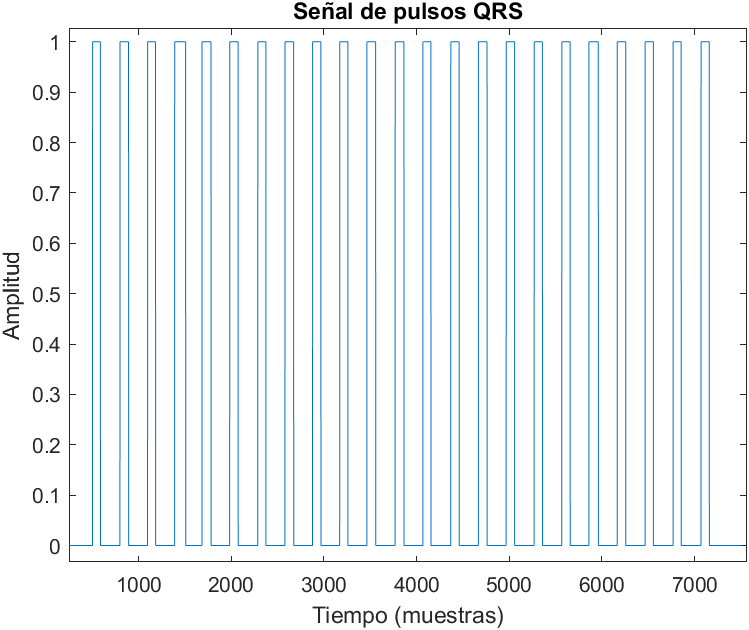

In [ ]:
# Codigo que genera una señal sintética de valor 1 cuando se da un QRS y de valor 0 cuando no.

escalon_QRS = zeros(1,length(x(1,:)));
ini= 1;
vec_ini = zeros(1, length(position(1).QRSon));
fin = 1;
vec_fin = zeros(1, length(position(1).QRSon));

for i=1:length(position(1).QRSon)
   if ~isnan(position(1).QRSon(i))
        ini = position(1).QRSon(i);
   end
   for j = 1:12
       if (~isnan(position(j).QRSon(i)) && position(j).QRSon(i)<ini)
           ini = position(j).QRSon(i);
       end
       if (~isnan(position(j).QRSoff(i)) &&position(j).QRSoff(i)>fin)
           fin = position(j).QRSoff(i);
       end
   end
   vec_ini(i) = ini;
   vec_fin(i) = fin;
   %disp(['Inicio del escalon: ',num2str(ini), ' Fin del escalon: ', num2str(fin)]);
   escalon_QRS(ini:fin) = 1;
end


Por el momento no estoy haciendo la comprobación para ver que la primera detección de un latido esté a una distancia pequeña de las demás detecciones; y que la última detección sea precedida de otras tantas. (Es una característica a añadir)

Además de esto, he implementado el código necesario para formar una matriz en la que en cada fila haya un pulso rectangular de esta señal sintética, con un poco de contexto de la señal antes (medio segundo), y un poco después del escalón.


In [ ]:
# Código que forma la matriz imagen de la señal de QRS sintetica
matriz = [];
N_antes = hea.freq*0.5;   % Muestras a coger antes del evento
N_despues = 20;     % Muestras a coger despues del evento
Tam = N_antes+ max(vec_fin-vec_ini) + N_despues;
for i=1:length(position(1).QRSon)
    if (~isnan(vec_fin(i))&& ~isnan(vec_ini(i)))
        N_despues = Tam- N_antes- (vec_fin(i)-vec_ini(i));
    end
    if(vec_ini(i)-N_antes>0 && vec_fin(i)+N_despues-1<length(escalon_QRS))
        
            row = escalon_QRS(vec_ini(i)-N_antes:vec_fin(i)+N_despues-1);
            matriz =[matriz; row];
    end
end

imagesc(matriz);

Esta imagen podría ser generada de igual manera para las ondas P y T. En este caso para el complejo QRS tiene la siguiente pinta: 
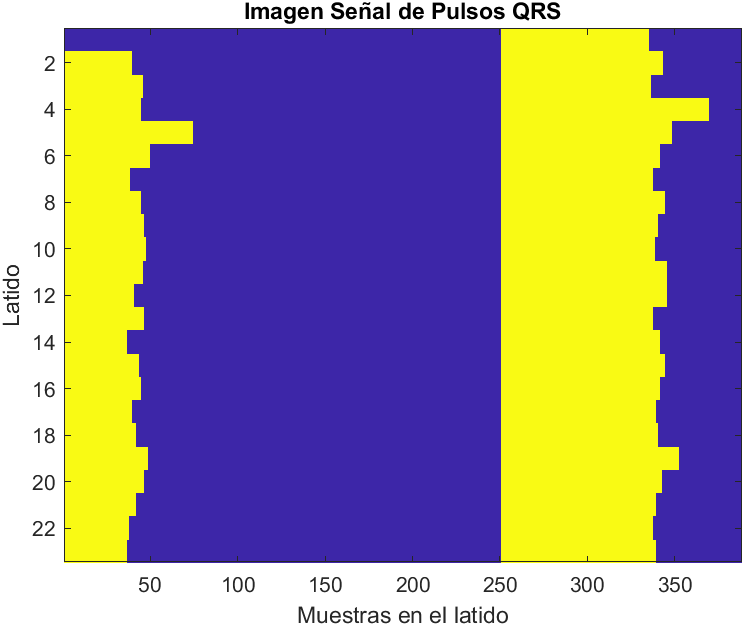

#Día 3 de mayo de 2021

Tras hablar con Juan Pablo hemos visto que había algunos problemas al tratar de delinear un fichero remuestreado. Esto era debido a que esta señal remuestreada se almacenaba en un .mat con un save usual de matlab. Lo que ocurría después era que wavedet intentaba leer dicho fichero como un binario con su cabezera y demás campo, y al no tener el mismo formato lo que interpretaba como señal eran datos aleatorios. Por este motivo se producían un montón de anotaciones repetidas y la delineación era incorrecta. Para solucionar esto, el fichero con la señal remuestreada ahora se genera de la siguiente forma:



In [ ]:
# Código que genera el fichero con la señal remuestreada a 500 Hz y el fichero .hea actualizado

fid=fopen(file);
x=fread(fid,[12 Inf],'int16');
fclose(fid);
sig = x(:,2:end);
sig=1000/hea.gain(lead) * sig; % in microvolts (para tener la señal en microvoltios incluso siendo otra la ganancia)
sigdir = 'Training_WFDB_StPetersburg\';headir = 'Training_WFDB_StPetersburg\';matdir = 'Training_WFDB_StPetersburg\';

if hea.freq~=500
    disp('Remuestreando señal');
    sig2 = resample(sig', 500, hea.freq)'; % Remuestreamos para tenerla a 500 Hz
    sig2 = int16(sig2);
    datos = [x(:,1) sig2];
    fid2 = fopen(['Ficheros_Fs_Cambiada\','I0001.mat'], 'w+');
    fwrite(fid2, datos,'int16');
    fclose(fid2);
    hea.freq = 500;

    fid = fopen(['Ficheros_Fs_Cambiada\',hea.recname,'.hea'], 'w');
    for i=0:hea.nsig
        if i==0
            fprintf(fid, [hea.recname,' ',num2str(hea.nsig), ' ',num2str(hea.freq),' ', num2str(size(sig2,2)), ' ', num2str(hea.btime(1:end)), '\n']);
        else
            fprintf(fid,[hea.fname(i,:), ' ', num2str(hea.fmt(i)),'+',num2str(hea.offset(i)),' ', num2str(hea.gain(i)),'/',hea.units(i,:),' ', num2str(hea.adcres(i)),' ', num2str(hea.adczero(i)),' ', num2str(hea.initval(i)),' ',num2str(hea.cksum(i)),' ', num2str(hea.bsize(i)), hea.desc(i,:),'\n' ]);
        end
    end
    fclose(fid);
    headir = 'Ficheros_Fs_Cambiada\';
    sigdir = 'Ficheros_Fs_Cambiada\';
    
end




Tras esto podemos detectar los QRS de estas derivaciones como en otras ocasiones con el siguiente código.

In [ ]:
position = [];      % Vector de stucts para almacenar los indices del delineador
for lead = 1:hea.nsig
    p = wavedet(sigdir, headir,matdir, hea.recname, 0, 'wav', lead, [1 Inf],0);
    if length(fieldnames(p))~=19
       p = empty_struct; 
    end
    position = [position,p];
end

Cabe destacar que a pesar de que la delineación se realiza y las anotaciones parecen estar bien siguen saliendo muchas anotaciones repetidas para los ficheros que están muestreados a 257 Hz. Se ha probado el mismo código en ficheros muestreados a 1000 Hz, bajando su frecuencia de muestreo a 500 Hz, y en esos casos no ha habido anotaciones repetidas. Hay que tener en cuenta también que los ficheros a 257 Hz son mucho más largos que los que están a 1000 Hz (30 minutos frente a unos 2 minutos).
Las anotaciones repetidas al delinear el fichero I0005.mat pueden verse por delineación a continuación.

In [ ]:
Remuestreando señal
Delineando derivacion 1
Delineando derivacion 2
Warning: There is a repeated annotation at sample: 111847.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 200969.000000 tipo 8 0 
Warning: There is a repeated annotation at sample: 723646.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 876550.000000 tipo 1 0 
Warning: There is a repeated annotation at sample: 898388.000000 tipo 2 0 
Delineando derivacion 3
Warning: There is a repeated annotation at sample: 459682.000000 tipo 7 2 
Delineando derivacion 4
Delineando derivacion 5
Delineando derivacion 6
Warning: There is a repeated annotation at sample: 891489.000000 tipo 7 2 
Delineando derivacion 7
Delineando derivacion 8
Delineando derivacion 9
Warning: There is a repeated annotation at sample: 153670.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 500511.000000 tipo 7 2 
Warning: There is a repeated annotation at sample: 503307.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 509724.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 512730.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 523696.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 525633.000000 tipo 2 0 
Warning: There is a repeated annotation at sample: 660288.000000 tipo 2 0 
Delineando derivacion 10
Warning: There is a repeated annotation at sample: 533372.000000 tipo 8 0 
Delineando derivacion 11
Warning: There is a repeated annotation at sample: 660292.000000 tipo 2 0 
Delineando derivacion 12
Warning: There is a repeated annotation at sample: 27851.000000 tipo 8 0 

Llegado a este punto pensé que quizás esto era debido a que las frecuencias de muestreo no eran divisores y el remuestreo no lo hacía adecuadamente. Para comprobarlo probé con un factor de remuestreo de 500/250 en vez de uno de 500/257. Las anotaciones repetidas fueron las mismas que en el caso anterior.
En cualquier caso, debido a que la delineación no tiene demasiados errores, salvo algun latido ectópico, por el momento seguiré avanzando en otros frentes.
Otro de los aspectos a mejorar que me comentó Juan Pablo es el de la señal sintética de escalones de QRS. Una vez colocados conformando la imágen, la posición de estos escalones debe ser coherente con la posición de los QRS fisiológicos en las demás imágenes. Es decir, los escalones deben estar centrados en la posición global de cada QRS y deben dejar el mismo contexto anterior y posterior que se dejaba para las imágenes de las derivaciones. Además debemos excluír el primer y último latido para aportar homogeneidad a la imagen.
Esto tiene fácil solución puesto que a la señal sintética se le puede aplicar literalmente el mismo código de formación de matriz imágen que usamos para las derivaciones fisiológicas.

Por otro lado Juan Pablo también incidió en la importancia de aplicar unas reglas de seguridad a la hora de generar la señal sintética de escalones de QRS. Esto es, que solo tomemos un inicio de QRS como tal si unos 12 ms después de este se detecta el QRS en al menos otras 3 derivaciones; y que solo tomemos un fin de QRS como tal, si unos 12 ms antes hemos detectado al menos 3 fines de QRS.
Para esto debo modificar el código de generación de la señal sintética.



#Día 5 de mayo de 2021
He realizado la alineación de los pulsos rectangulares con los QRS usando el mismo código que para las imágenes de las derivaciones. Es como el que sigue.

In [ ]:

matriz = [];
N_antes = hea.freq*0.5;   % Muestras a coger antes del evento (medio segundo)
N_despues = hea.freq;     % Muestras a coger despues del evento (un segundo)
for i = 2:length(gl_ind)-1
    if(gl_ind(i)-N_antes>0 && gl_ind(i)+N_despues-1<length(escalon_QRS))
        row = escalon_QRS(gl_ind(i)-N_antes:gl_ind(i)+N_despues-1);
        matriz =[matriz; row];
    end
end

figure,
imagesc(matriz)

También he aplicado las reglas de generación de los pulsos rectangulares, para evitar outlayers la primera detección delinicio del QRS debe estar menos de 12 ms antes de al menos 3 derivaciones más; y la última detección del fin de un QRS debe estar precedida por al menos 3 detecciones del fin más en el mismo intervalo de 12 ms.

El código que he ideado no es muy óptimo pero funciona y es el que sigue:

In [ ]:
# Codigo que genera la señal sintetica de inicio y fin de QRS aplicando reglas para evitar outlayers
margen = hea.freq*12e-3;
conf = 0;
escalon_QRS = zeros(1,length(x(1,:)));
ini= 1;
vec_ini = zeros(1, length(position(1).QRSon));
fin = 1;
vec_fin = zeros(1, length(position(1).QRSon));
no_ini = 1;
no_fin = 1;
for i=1:length(position(1).QRSon)
   disp(['Analizando latido ', num2str(i)]);
   ini_candidates = [];
   fin_candidates = [];
   for k=1:12
     ini_candidates = [ini_candidates, position(k).QRSon(i)];
     fin_candidates = [fin_candidates, position(k).QRSoff(i)];
   end
   
   if(sum(isnan(ini_candidates))<4 && sum(isnan(fin_candidates))<4)   % Si mas de 4 indices son NaN no proceso el latido
       while no_ini         % Estaremos en el while hasta que encontremos un ini confirmado
           conf=0;
           [ini, ind_ini] = min(ini_candidates);     % Inicialmente supongo que la primera deteccion es el inicio
           for j = 1:12
                % Si despues de la supuesta primera deteccion vienen al menos 3
                % mas, esa deteccion de inicio sera correcta
               if abs(ini-position(j).QRSon(i))<=margen                                           
                   conf = conf+1;
               end
           end
           if conf>=3       % Confirmamos que ini es un valor real de inicio
               no_ini=0;
               disp('Inicio confirmado');
           else             % Si este no era un inicio real lo eliminamos de los posibles ini
                ini_candidates(ind_ini) = [];
           end
       end
       while no_fin         % Estaremos en el while hasta que encontremos un fin confirmado
           conf=0;
           [fin, ind_fin] = max(fin_candidates);     % Inicialmente supongo que la ultima deteccion es el final
           for j = 1:12
                % Si antes de la supuesta ultima deteccion vienen al menos 3
                % mas, esa deteccion de fin sera correcta
               if abs(fin-position(j).QRSoff(i))<=margen                                           
                   conf = conf+1;
               end
           end
           if conf>=3       % Confirmamos que fin es un valor real de final
               no_fin=0;
               disp('Final confirmado');
           else             % Si este no era un final real lo eliminamos de los posibles fin
               fin_candidates(ind_fin) = [];
           end
       end
       
       vec_ini(i) = ini;
       vec_fin(i) = fin;
       %disp(['Inicio del escalon: ',num2str(ini), ' Fin del escalon: ', num2str(fin)]);
       escalon_QRS(ini:fin) = 1;
       no_ini=1;
       no_fin=1;
   end
   
end

Aplicando este código he consegido generar imágenes sintéticas de inicio y fin de QRS (evitando posibles outlayers), que están alineadas con las imágenes de cada derivación. Un ejemplo de como quedan estas imágenes y su alineación puede verse a continuación.


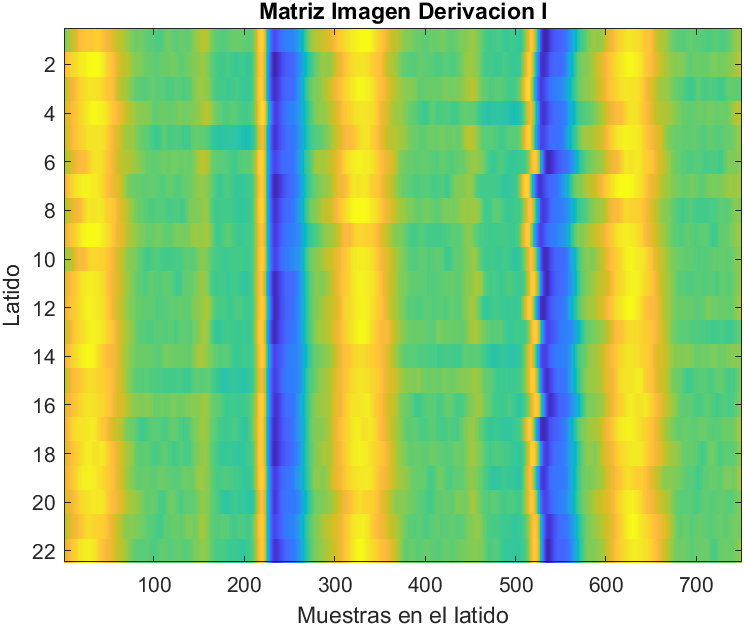
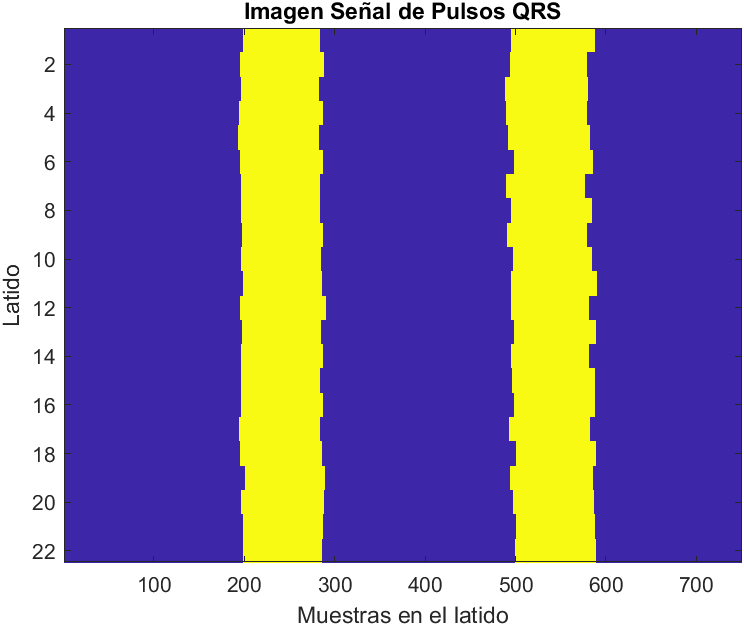

En este ejemplo los QRS no se ven perfectamente alineados, pero debemos tener en cuenta que la señal sintética modela la posición y duración de los QRS a nivel global, después de promediar con las 12 derivaciones. Por este motivo no coincidirá exactamente con ninguna de las derivaciones concretas.

#Día 8 de mayo de 2021
Hoy he adaptado el código para generar señales sintéticas también de las ondas P y T. Además, he incluído esto en el código de procesado del dataset, por lo que ahora este es capaz de generar todas las imágenes requeridas para un fichero cualquiera. Una duda que me ha surgido es si las imágenes de cada derivación deberían estar alineadas respecto a los índices de QRS globales (como las señales sintéticas), o si deberían segir referenciadas a los latidos concretos de cada derivación. A primera vista me parece que tendría más sentido que todo estuviera referenciado a los índices globales pero no obstantelo preguntaré.

Por otro lado, el aspecto final de las tres señales sintéticas es el que sigue.



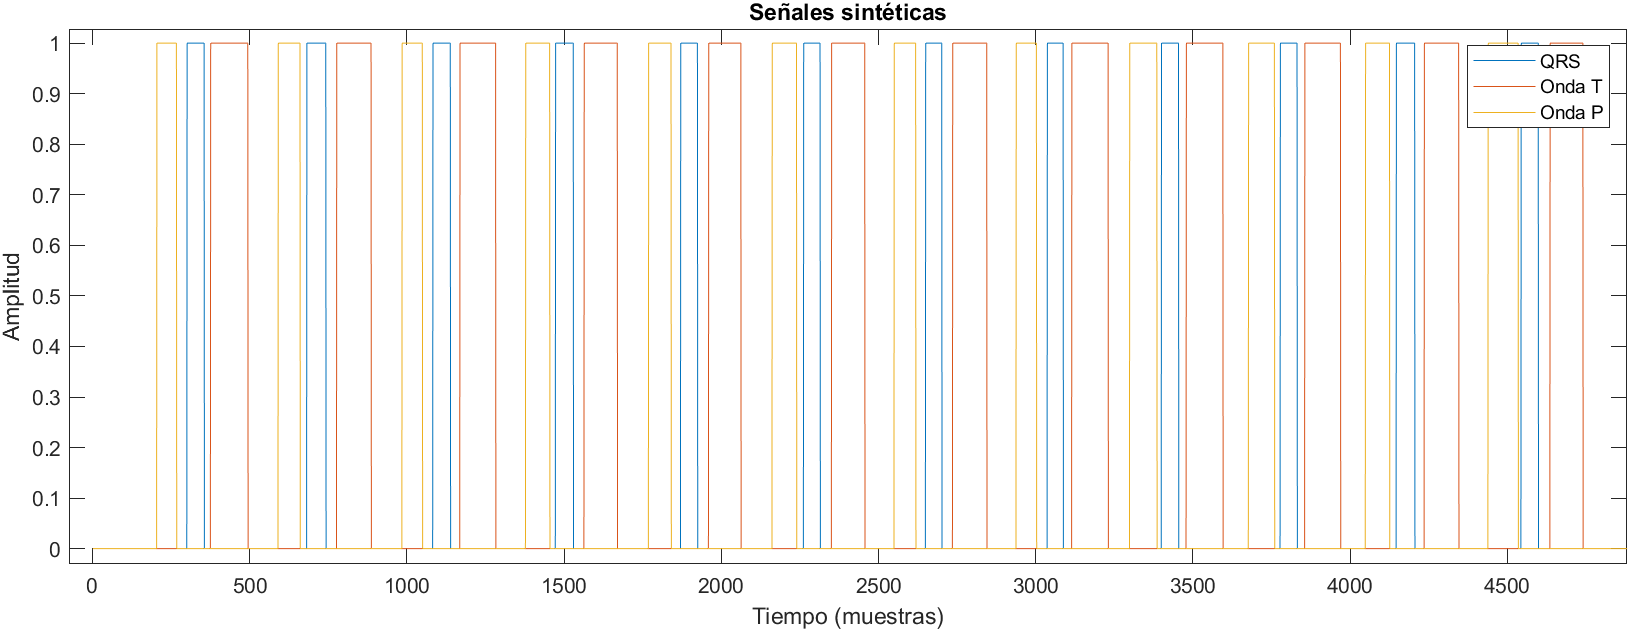

#Día 11 de mayo de 2021
Hoy he estado intentando procesar completamente 100 ficheros del dataset CPS y me he encontrado con algunos problemas. El primero es que la generación de las señales sintéticas de inicio y fin de QRS, onda P y T no se calcula correctamente. Esto es porque el margen en el cual tienen que detectarse varias anotaciones para eliminar outlayers tenía un valor inapropiado. Para los QRS consideraba que el margen es de unos 12 ms, pero si uso este mismo margen para las ondas P y T ninguna anotación cumple las reglas. Por este motivo supongo que debe de haber otro margen para las ondas P y T que sea más adecuado.
Por lo demas, ademas de los márgenes todo funciona bien y las imágenes son guardadas sin problemas.
Un ejemplo de las imágenes resultantes puede verse a continuación.

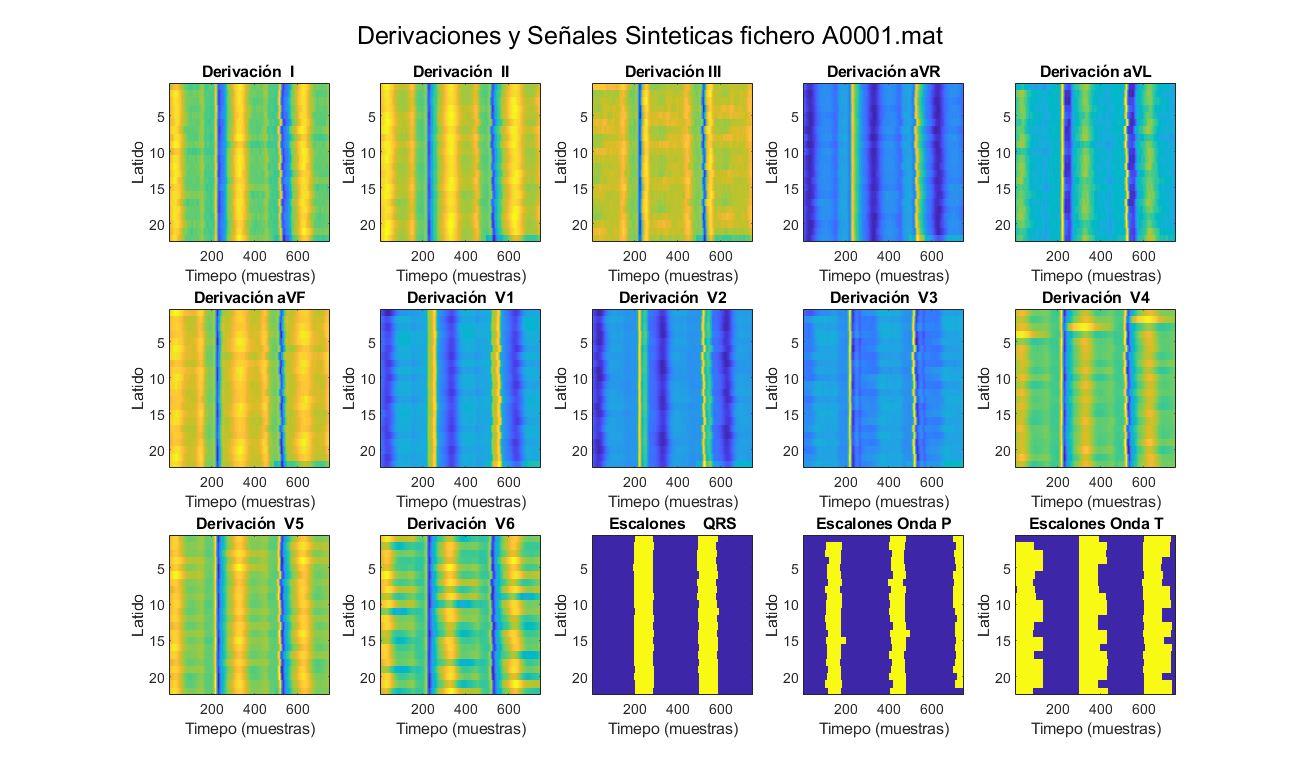

En la señal de escalones de onda T se aprecia un alineamiento de los pulsos rectangulares que no debería estar. Debe de ser un error en el código que forma la imagen a partir de la señal. La idea sería que todas las imágnes estuvieran mostrando "la misma ventana temporal" en cada fila, y esta ventana siempre mostraría un latido y el inicio del siguiente, más o menos. El caso es que para las imágenes del QRS y la Onda P se aprecia bien como cada una está en su "instante temporal correcto" respecto a las demás. Por otro lado las imágenes de cada derivación están alineadas en esta "ventana" usando su posición particular de qrs, y NO las anotaciones QRS globales que se calculan. 

Esto creo que sería algo a cambiar ya que haría que realmente todas las imágenes estuvieran referenciadas a lo mismo.


#Día 16 de mayo de 2021
Hoy hemos tenido una sesión de tutoría en la que hemos hablado de varias cosas. En primer lugar se ha hablado de esos casos en los que no podía encontrar ondas P para formar la señal de pulsos rectangulares. Juan Pablo ha indicado que ampliar el margen en el que damos por bueno un inicio o fin de onda P no tenía por qué ser una buena solución, ya que hay patologías que causan que la onda P no se muestre en el ECG o se vea muy afectada. Debido a esto, y a que nos interesa extraer las características de las patologías hemos dejado el márgen en 12 ms, obteniendo señales sinteticas de onda P en los casos en los que esta no aparece por alguna patología. Un ejemplo de eso sería el observado en el fichero A0026.mat, que se muestra a continuación.

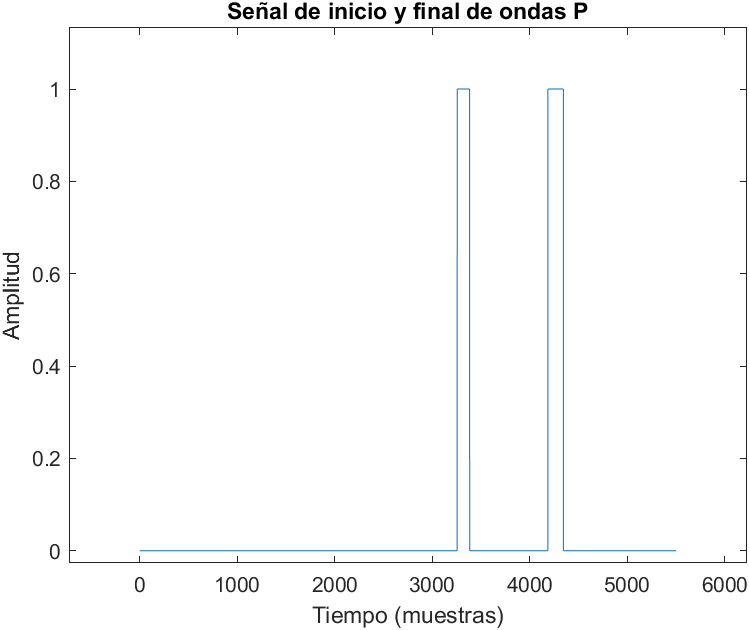

En este caso vemos como no se han detectado casi ondas P. Esto es correcto ya que el paciente presenta Fibrilación Auricular y por tanto en su ECG no deberían aparecer ondas P. Las dos que se detectan entran dentro de los posibles errores del delineador y de la acción del ruido.
Por este motivo se ha resuelto que segiríamos con un margen de 12 ms, y que en caso de cambiarlo en un futuro se probaría con márgenes menores.

Otra cosa de la que hemos hablado es de que se podría intentar que en las imágnes sintéticas de QRS, onda P y T solo se vean dos pulsos por fila. La idea sería que en la imagen no quedase nunca cortado un pulso. No sabemos si esto quitaría contexto a la red o si le facilitaría el trabajo ya que no podría confuncir ese pulso cortado con un pulso muy corto. En todo caso la idea sería probar las dos opciones.

En cuanto al desarrollo de la red neuronal hemos hablado de empezar ideando el cargador de datos. Este es un código que nos permitirá cargar rapidamente datos para ofrecer a la red durante el entrenamiento.
Otro aspecto relacionado con esto es la manera en la que guardamos las matrices imagen tras el procesado. Por el momento yo las estaba guardando en un cell(1, nsig+3) con nsig=12, y despues con un save de ese cell. Sin embargo, Antonio me ha sugerido que las almacene en tensores directamente. Esto sería, en caso de tener, por ejemplo, imagenes de 32x32, una variable de dimensiones 15x32x32. Esto es fácil de realizar en Matlab pero no se si después tendremos problemas para concatenar los tensores si las imágenes son de dimensiones diferentes (las dimensiones dependen de la longitud del fichero y del número de latidos).
También hemos acordad que guardaríamos las imagenes con precisión simple en vez de doble (32 bits en vez de 64) para ahorrar espacio (matrices = single(matrices)).

Otras modificaciones que he hecho han sido usar los indices de QRS globales para formar las imágnes de todas las derivaciones y la comprobación del buen funcionamiento del código con el uso de tensores guardados con precision simple.
El código de procesado de dataset enteros a día de hoy es el que sigue.

In [ ]:
%% Procesado
empty_struct = struct('Pon',{[]},'P',{[]},'Poff',{[]}, 'QRSon',{[]},'Q',{[]},'R',{[]},'Fiducial',{[]},'qrs',{[]},'Rprima',{[]},'S',{[]},'QRSoff',{[]}, 'Ton',{[]},'T',{[]},'Tprima',{[]},'Toff',{[]},'Ttipo',{[]},'QRSmainpos',{[]},'QRSmaininv',{[]},'Pprima',{[]});
hea_path = 'Training_WFDB_CPS\';
for fichero=1:100
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~LECTURA DATOS
    disp(['Procesando fichero ',num2str(fichero)]);
    if fichero<10
        num=['000', num2str(fichero)];
        elseif (fichero>=10 && fichero<100)
                num=['00', num2str(fichero)];
            elseif (fichero>=100 && fichero<1000)
                    num=['0', num2str(fichero)];
                else
                    num=num2str(fichero);
     end
    
    file_path = hea_path;
    filname = ['A',num,'.mat'];
    file = [file_path,filname];
    header = [hea_path,'A',num,'.hea'];
    lead = 1;
    hea = readheader(header);   % -> Struct con todos los campos de informacion
    fid=fopen(file);
    x=fread(fid,[12 Inf],'int16');
    fclose(fid);
    sig = x(:,2:end);
    sig=1000/hea.gain(lead) * sig; % in microvolts (para tener la señal en microvoltios incluso siendo otra la ganancia)
    %sigdir = 'Training_WFDB_StPetersburg\';headir = 'Training_WFDB_StPetersburg\';matdir = 'Training_WFDB_StPetersburg\';
    sigdir = 'Training_WFDB_CPS\';headir = 'Training_WFDB_CPS\';matdir = 'Training_WFDB_CPS\';
    
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~REMUESTREO
    if hea.freq~=500
        disp('Remuestreando señal');
        sig2 = resample(sig', 500, hea.freq)'; % Remuestreamos para tenerla a 500 Hz
        sig2 = int16(sig2);
        datos = [x(:,1) sig2];
        clear x;
        x = datos;
        fid2 = fopen(['Ficheros_Fs_Cambiada\',hea.recname,'.mat'], 'w+');
        fwrite(fid2, datos,'int16');
        fclose(fid2);
        
        hea.freq = 500;

        fid = fopen(['Ficheros_Fs_Cambiada\',hea.recname,'.hea'], 'w');
        for i=0:hea.nsig
            if i==0
                fprintf(fid, [hea.recname,' ',num2str(hea.nsig), ' ',num2str(hea.freq),' ', num2str(size(sig2,2)), ' ', num2str(hea.btime(1:end)), '\n']);
            else
                fprintf(fid,[hea.fname(i,:), ' ', num2str(hea.fmt(i)),'+',num2str(hea.offset(i)),' ', num2str(hea.gain(i)),'/',hea.units(i,:),' ', num2str(hea.adcres(i)),' ', num2str(hea.adczero(i)),' ', num2str(hea.initval(i)),' ',num2str(hea.cksum(i)),' ', num2str(hea.bsize(i)), hea.desc(i,:),'\n' ]);
            end
        end
        fclose(fid);
        headir = 'Ficheros_Fs_Cambiada\';
        sigdir = 'Ficheros_Fs_Cambiada\';
        matdir = 'Ficheros_Fs_Cambiada\';
    end
    
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DELINEADOR
    disp('Delineando señal');
    position = [];      % Vector de stucts para almacenar los indices del delineador
    for lead = 1:hea.nsig
        p = wavedet(sigdir, headir,matdir, hea.recname, 0, 'wav', lead, [1 Inf],0);
        if length(fieldnames(p))~=19
           p = empty_struct; 
        end
        position = [position,p];
    end
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BASELINE
    disp('Eliminando Baseline');
    not_samples = hea.freq*80e-3;
    x_limpia = zeros(size(x,1),size(x,2));
    for lead = 1:hea.nsig
        x_lead = x(lead,:);
        x_limpia(lead,:) = baseline2(x_lead', round(position(lead).qrs - 0.08 *hea.freq), 0, not_samples)';
    end
    clear x;
    x=x_limpia;
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~GLOBAL IND
    disp('Calculando indices globales');
    N_mismo_latido = 500*100*1e-3;    
    v = hanning(N_mismo_latido);
    deltas = zeros(12,size(x,2));
    convs = zeros(12, size(x,2)+length(v)-1);
    for i = 1:hea.nsig
        if ~isnan(position(i).qrs)
            deltas(i,position(i).qrs)=1;
        end
        convs(i,:) = conv(deltas(i,:),v);
    end
    latidos = sum(convs,1);
    [pks,gl_ind] = findpeaks(latidos,'MinPeakHeight',8);
    if isempty(gl_ind)
        disp('Warning: Fallo de calculo de indices globales de QRS');
    end
    save('AnotacionesQRS\anot.mat','gl_ind');
    
    %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ANOTACIONES EXTERNAS
    dirann = 'AnotacionesQRS\';
    position = [];      % Vector de stucts para almacenar los indices del delineador
    for lead = 1:hea.nsig
        p = wavedet(sigdir, headir,matdir, hea.recname, 0, 'wav', lead, [1 Inf],1,1,'anot',dirann);
        position = [position, p];
    end
    %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SEÑALES SINTETICAS
    disp('Generando señales sinteticas');
    % Formacion señal escalon de QRS
    margen = hea.freq*12e-3;
    conf = 0;
    escalon_QRS = zeros(1,length(x(1,:)));
    ini= 1;
    vec_ini = zeros(1, length(position(1).QRSon));
    fin = 1;
    vec_fin = zeros(1, length(position(1).QRSon));
    no_ini = 1;
    no_fin = 1;
    disp('-----------QRS');
    for i=1:length(position(1).QRSon)
       disp(['Analizando latido ', num2str(i)]);
       ini_candidates = [];
       fin_candidates = [];
       for k=1:12
         ini_candidates = [ini_candidates, position(k).QRSon(i)];
         fin_candidates = [fin_candidates, position(k).QRSoff(i)];
       end

       if(sum(isnan(ini_candidates))<4 && sum(isnan(fin_candidates))<4)   % Si mas de 4 indices son NaN no proceso el latido
           while no_ini         % Estaremos en el while hasta que encontremos un ini confirmado
               conf=0;
               [ini, ind_ini] = min(ini_candidates);     % Inicialmente supongo que la primera deteccion es el inicio
               for j = 1:12
                    % Si despues de la supuesta primera deteccion vienen al menos 2
                    % mas, esa deteccion de inicio sera correcta
                   if abs(ini-position(j).QRSon(i))<=margen                                           
                       conf = conf+1;
                   end
               end
               if conf>=3       % Confirmamos que ini es un valor real de inicio
                   no_ini=0;
                   disp('Inicio confirmado');
               else             % Si este no era un inicio real lo eliminamos de los posibles ini
                    ini_candidates(ind_ini) = [];
               end
           end
           while no_fin         % Estaremos en el while hasta que encontremos un fin confirmado
               conf=0;
               [fin, ind_fin] = max(fin_candidates);     % Inicialmente supongo que la ultima deteccion es el final
               for j = 1:12
                    % Si antes de la supuesta ultima deteccion vienen al menos 3
                    % mas, esa deteccion de fin sera correcta
                   if abs(fin-position(j).QRSoff(i))<=margen                                           
                       conf = conf+1;
                   end
               end
               if conf>=3       % Confirmamos que fin es un valor real de final
                   no_fin=0;
                   disp('Final confirmado');
               else             % Si este no era un final real lo eliminamos de los posibles fin
                   fin_candidates(ind_fin) = [];
               end
           end

           vec_ini(i) = ini;
           vec_fin(i) = fin;
           %disp(['Inicio del escalon: ',num2str(ini), ' Fin del escalon: ', num2str(fin)]);
           escalon_QRS(ini:fin) = 1;
           no_ini=1;
           no_fin=1;
       end

    end
    %figure, plot(escalon_QRS), title 'Señal de pulsos QRS', xlabel 'Tiempo (muestras)', ylabel 'Amplitud';
    disp('--------Onda P');
    % Formacion señal escalon de onda P
    latido_nulo=0;
    conf = 0;
    escalon_P = zeros(1,length(x(1,:)));
    ini= 1;
    vec_ini = zeros(1, length(position(1).Pon));
    fin = 1;
    vec_fin = zeros(1, length(position(1).Pon));
    no_ini = 1;
    no_fin = 1;
    for i=1:length(position(1).Pon)
       %disp(['Analizando latido ', num2str(i)]);
       ini_candidates = [];
       fin_candidates = [];
       for k=1:12
         ini_candidates = [ini_candidates, position(k).Pon(i)];
         fin_candidates = [fin_candidates, position(k).Poff(i)];
       end

       if(sum(isnan(ini_candidates))<4 && sum(isnan(fin_candidates))<4)   % Si mas de 4 indices son NaN no proceso el latido
           while no_ini         % Estaremos en el while hasta que encontremos un ini confirmado
               conf=0;
               [ini, ind_ini] = min(ini_candidates);     % Inicialmente supongo que la primera deteccion es el inicio
               for j = 1:12
                    % Si despues de la supuesta primera deteccion vienen al menos 2
                    % mas, esa deteccion de inicio sera correcta
                   if abs(ini-position(j).Pon(i))<=margen                                           
                       conf = conf+1;
                   end
               end
               if conf>=3       % Confirmamos que ini es un valor real de inicio
                   no_ini=0;
                   %disp('Inicio confirmado');
               else             % Si este no era un inicio real lo eliminamos de los posibles ini
                    ini_candidates(ind_ini) = [];
               end
               if isempty(ini_candidates)
                   latido_nulo = 1;
                    disp('Inicio no encontrado');
                   break;
               end
           end
           while no_fin         % Estaremos en el while hasta que encontremos un fin confirmado
               conf=0;
               [fin, ind_fin] = max(fin_candidates);     % Inicialmente supongo que la ultima deteccion es el final
               for j = 1:12
                    % Si antes de la supuesta ultima deteccion vienen al menos 2
                    % mas, esa deteccion de fin sera correcta
                   if abs(fin-position(j).Poff(i))<=margen                                           
                       conf = conf+1;
                   end
               end
               if conf>=3       % Confirmamos que fin es un valor real de final
                   no_fin=0;
                   %disp('Final confirmado');
               else             % Si este no era un final real lo eliminamos de los posibles fin
                   fin_candidates(ind_fin) = [];
               end
               if isempty(fin_candidates)
                   latido_nulo = 1;
                    disp('Final no encontrado');
                   break;
               end
           end
            if (~latido_nulo)
               vec_ini(i) = ini;
               vec_fin(i) = fin;
               %disp(['Inicio del escalon: ',num2str(ini), ' Fin del escalon: ', num2str(fin)]);
               escalon_P(ini:fin) = 1;
            end
           no_ini=1;
           no_fin=1;
       end

    end
    %hold on, plot(escalon_P), title 'Señal de pulsos P', xlabel 'Tiempo (muestras)', ylabel 'Amplitud';
    disp('--------Onda T');
    % Formacion señal escalon de onda T
    latido_nulo=0;
    conf = 0;
    escalon_T = zeros(1,length(x(1,:)));
    ini= 1;
    vec_ini = zeros(1, length(position(1).Ton));
    fin = 1;
    vec_fin = zeros(1, length(position(1).Ton));
    no_ini = 1;
    no_fin = 1;
    for i=1:length(position(1).Ton)
       %disp(['Analizando latido ', num2str(i)]);
       ini_candidates = [];
       fin_candidates = [];
       for k=1:12
         ini_candidates = [ini_candidates, position(k).Ton(i)];
         fin_candidates = [fin_candidates, position(k).Toff(i)];
       end

       if(sum(isnan(ini_candidates))<4 && sum(isnan(fin_candidates))<4)   % Si mas de 4 indices son NaN no proceso el latido
           while no_ini         % Estaremos en el while hasta que encontremos un ini confirmado
               conf=0;
               [ini, ind_ini] = min(ini_candidates);     % Inicialmente supongo que la primera deteccion es el inicio
               for j = 1:12
                    % Si despues de la supuesta primera deteccion vienen al menos 2
                    % mas, esa deteccion de inicio sera correcta
                   if abs(ini-position(j).Ton(i))<=margen                                           
                       conf = conf+1;
                   end
               end
               if conf>=3       % Confirmamos que ini es un valor real de inicio
                   no_ini=0;
                   %disp('Inicio confirmado');
               else             % Si este no era un inicio real lo eliminamos de los posibles ini
                    ini_candidates(ind_ini) = [];
               end
               if isempty(ini_candidates)
                   latido_nulo = 1;
                    disp('Inicio no encontrado');
                   break;
               end
           end
           while no_fin         % Estaremos en el while hasta que encontremos un fin confirmado
               conf=0;
               [fin, ind_fin] = max(fin_candidates);     % Inicialmente supongo que la ultima deteccion es el final
               for j = 1:12
                    % Si antes de la supuesta ultima deteccion vienen al menos 3
                    % mas, esa deteccion de fin sera correcta
                   if abs(fin-position(j).Toff(i))<=margen                                           
                       conf = conf+1;
                   end
               end
               if conf>=3       % Confirmamos que fin es un valor real de final
                   no_fin=0;
                   %disp('Final confirmado');
               else             % Si este no era un final real lo eliminamos de los posibles fin
                   fin_candidates(ind_fin) = [];
               end
               if isempty(fin_candidates)
                   latido_nulo = 1;
                    disp('Final no encontrado');
                   break;
               end
           end
            if(~latido_nulo)
               vec_ini(i) = ini;
               vec_fin(i) = fin;
               %disp(['Inicio del escalon: ',num2str(ini), ' Fin del escalon: ', num2str(fin)]);
               escalon_T(ini:fin) = 1;
            end
            no_ini=1;
            no_fin=1;
       end

    end
    %hold on, plot(escalon_T), title 'Señal de pulsos T', xlabel 'Tiempo (muestras)', ylabel 'Amplitud';
    
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FORMACION DE IMAGENES
    disp('Formando imagenes');
    %matrices = cell(1, hea.nsig+3);
    matrices = zeros(length(position(lead).qrs)-2,750,15);
    matriz = [];
    N_antes = hea.freq*0.5;   % Muestras a coger antes del evento
    N_despues = hea.freq;     % Muestras a coger despues del evento
    for lead=1:hea.nsig
        x_lead = x(lead,:);
        for i = 2:length(position(lead).qrs)-1
            if(gl_ind(i)-N_antes>0 && gl_ind(i)+N_despues-1<length(x_lead))
                row = x_lead(gl_ind(i)-N_antes:gl_ind(i)+N_despues-1);
                matriz =[matriz; row];
            end
        end
        matrices(:,:,lead) =  matriz;
        matriz = [];
    end
    % matrices ahora contiene las matrices imagen de cada derivacion
    % Falta añadir las matrices imagen de las señales sinteticas
    matriz = [];
    for i = 2:length(gl_ind)-1
        if(gl_ind(i)-N_antes>0 && gl_ind(i)+N_despues-1<length(escalon_QRS))
            row = escalon_QRS(gl_ind(i)-N_antes:gl_ind(i)+N_despues-1);
            matriz =[matriz; row];
        end
    end
    matrices(:,:,hea.nsig+1) =  matriz;
    matriz = [];
    for i = 2:length(gl_ind)-1
        if(gl_ind(i)-N_antes>0 && gl_ind(i)+N_despues-1<length(escalon_P))
            row = escalon_P(gl_ind(i)-N_antes:gl_ind(i)+N_despues-1);
            matriz =[matriz; row];
        end
    end
    matrices(:,:,hea.nsig+2) =  matriz;
    matriz = [];
    for i = 2:length(gl_ind)-1
        if(gl_ind(i)-N_antes>0 && gl_ind(i)+N_despues-1<length(escalon_T))
            row = escalon_T(gl_ind(i)-N_antes:gl_ind(i)+N_despues-1);
            matriz =[matriz; row];
        end
    end
    matrices(:,:,hea.nsig+3) =  matriz;
    % ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SAVE IMG
    disp('Guardando imagenes');
    matrices = single(matrices);
    save(['Matrices procesadas\Matrices_',filname], 'matrices');
end


